## Exercise 1 - Gradient descent - Quadratic case

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'

-------------------------------

List of Work: Exercise 1
- Question 1 - problem finished
- Question 2 - problem finished
- Question 3 - problem finished
- Question 4 - problem finished

```

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 1**

A general quadratic function is defined by
$$
f(x)=\frac{1}{2} x^T A x-b \cdot x
$$
The gradient of this function is classical, but you should make sure you understand its computation. Compute the Frechet derivative and compare it to the gradient vector. The matrix form is preferred since it is shorter. Recall however what is the explicit formula for $f(x)$ in terms of $\left(x_i\right)$ and the elements of $A$ and $b$.
Prove that if $A$ is symmetric, positive-definite then the problem
$$
\min _{x \in \mathbb{R}^n} f(x)
$$
admits a unique solution. Write the associated optimality condition.
</div>



<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 1</td>
</tr>
</table>

---

To see this, note that
$$
\begin{align*}
f(x+h)  &= \frac{1}{2} (x+h)^T A (x+h)-b\cdot (x+h)-\frac{1}{2} x^T A x+b\cdot x \\
&= \frac{1}{2} (x^T A x+x^T A h+h^T A x+h^T A h)-b\cdot x-b\cdot h-\frac{1}{2} x^T A x+b\cdot x\\
&=\frac{1}{2}h^T A x+\frac{1}{2}x^T A h+\frac{1}{2}h^T A h-b\cdot h\\
&=h^T \left(\frac{1}{2}(A+A^T)x\right)-b\cdot h\\
&=h^T(Ax-b) + \frac{1}{2} h^T(A-A^T)x\\
&= h^T(Ax-b) \quad \text{(since $A$ is symmetric)}
\end{align*}
$$
Thus, we have $f(x+h)=f(x)+(A x-b) \cdot h+\frac{1}{2} h^{T} A h$ and we see that $L(h)=\nabla f(x)\cdot h$.

---

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2**

Study the example given on Moodle, where the gradient descent algorithm with fixed step and some other variants are implemented. Understand how you should modify the two functions, the one which computes the value of the objective function and another one which computes the gradient. In the quadratic case the solution should solve the system Ax = b, which you can compute using numpy.linalg.solve, in order to test the efficiency of your algorithm. 
</div>

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
import sympy as sym
%matplotlib notebook

def gradientFixedStep(f, df, x_init, step=1e-01, tol=1e-06, maxiter=200):
    # initialization
    x = x_init.copy()
    xtab = []
    ftab = []
    xtab.append(x)  # add x to the list xtab
    ftab.append(f(x))
    it = 0  # iteration count
    while ((it == 0)
           or (it < maxiter and np.linalg.norm(xtab[-1] - xtab[-2])) > tol):
        it = it + 1
        g = df(x)
        # line-search
        x = x - step * g
        xtab.append(x)
        ftab.append(f(x))
    # boolean to indicate the convergence
    if (it == maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

Matrix([
[1.0, 0.4],
[0.4, 2.0]])

Eigenvalues of A:  [0.85968758 2.14031242]
Maximal step for GD:  0.9344430176703427
Optimal step for GD:  0.6666666666666667
Initial value: 0.625


<IPython.core.display.Javascript object>


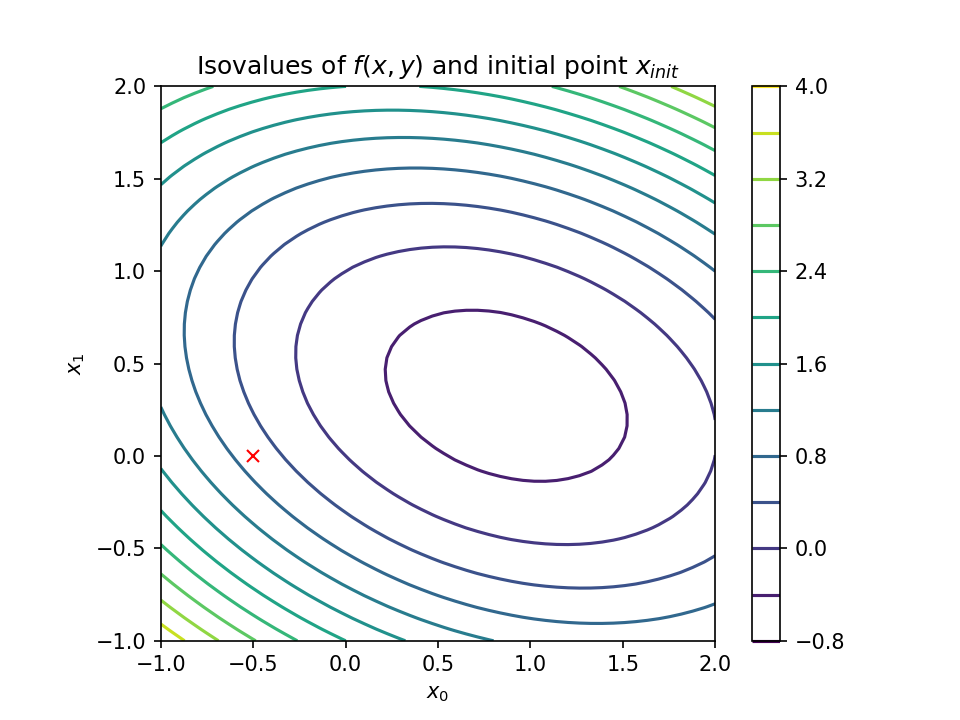

Has the algorithm converged ? :  True


<IPython.core.display.Javascript object>


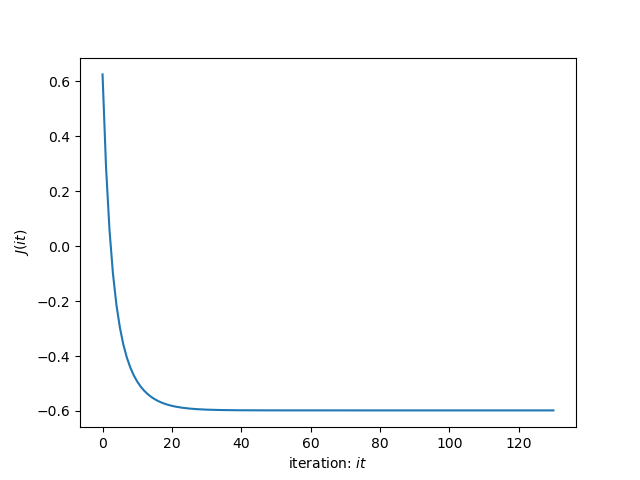

<IPython.core.display.Javascript object>


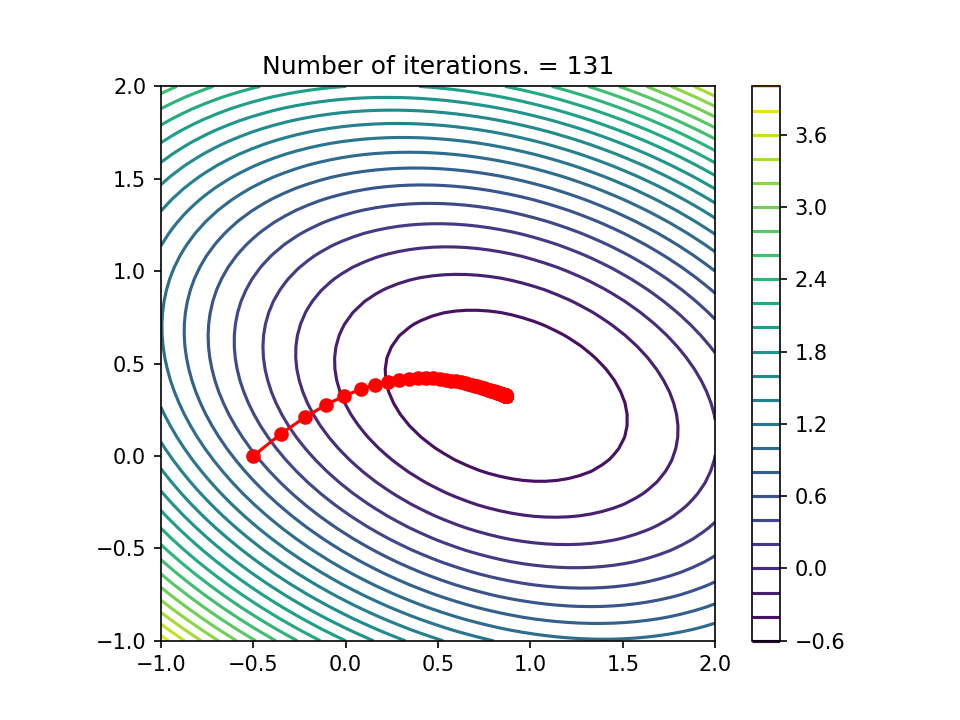

In [2]:
# Exercise 1.2 (a)
A = np.array([[1.0, 0.4], [0.4, 2]])
display(sym.Matrix(A))

ev = np.linalg.eig(A)[0]
print("Eigenvalues of A: ", ev)

maxstep = 2 / np.max(ev)
optstep = 2 / (np.max(ev) + np.min(ev))

print("Maximal step for GD: ", maxstep)
print("Optimal step for GD: ", optstep)

b = np.array([1, 1])
x0 = np.array([-0.5, 0])


def J(x):
    return 0.5 * np.dot(x, A @ x) - np.dot(b, x)


def GradJ(x):
    return A @ x - b


print("Initial value:", J(x0))

Tol = 1e-6
plt.figure(dpi=150)
xmin = -1
xmax = 2
ymin = -1
ymax = 2
aX0 = np.linspace(xmin, xmax)
aX1 = np.linspace(ymin, ymax)
Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0, aX1, Z, 12)
plt.plot(x0[0], x0[1], 'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $f(x,y)$ and initial point $x_{init}$')
plt.show()

xtab, ftab, conv = gradientFixedStep(J, GradJ, x0)
print('Has the algorithm converged ? : ', conv)
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

plt.figure(dpi=150)
plt.contour(aX0, aX1, Z, 25)

lx0 = [X[0] for X in xtab]
lx1 = [X[1] for X in xtab]
plt.plot(lx0, lx1, "-ro")
plt.title('Number of iterations. = ' + str(np.shape(lx0)[0]))
plt.axis('scaled')
plt.colorbar()
#plt.savefig('FixedStep001.png',dpi=300)

plt.show()

In [7]:
# Exercise 1.2 (b) - here we change the tolerance and find finally it get converged
A = np.array([[0.78, -0.02, -0.12, -0.14], [-0.02, 0.86, -0.04, 0.06],
              [-0.12, -0.04, 0.72, -0.08], [-0.14, 0.06, -0.08, 0.74]])
display(sym.Matrix(A))

ev = np.linalg.eig(A)[0]
print("Eigenvalues of A: ", ev)

maxstep = 2 / np.max(ev)
optstep = 2 / (np.max(ev) + np.min(ev))

print("Maximal step for GD: ", maxstep)
print("Optimal step for GD: ", optstep)

b = np.array([0.76, 0.08, 1.12, 0.68])
x0 = np.array([1, 1, 1, 1])


def J(x):
    return 0.5 * np.dot(x, A @ x) - np.dot(b, x)


def GradJ(x):
    return A @ x - b


print("Initial value:", J(x0))
Tol = 1e-8
xtab,ftab,conv = gradientFixedStep(J,GradJ,x0,Tol)
print('Has the algorithm converged ? : ',conv)


Matrix([
[ 0.78, -0.02, -0.12, -0.14],
[-0.02,  0.86, -0.04,  0.06],
[-0.12, -0.04,  0.72, -0.08],
[-0.14,  0.06, -0.08,  0.74]])

Eigenvalues of A:  [0.52 0.94 0.88 0.76]
Maximal step for GD:  2.127659574468087
Optimal step for GD:  1.3698630136986305
Initial value: -1.4300000000000002
Has the algorithm converged ? :  True


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2 (c)**

**(Challenge)** The Hilbert matrix defined by $H_{i, j}=1 /(i+j-1), 1 \leq i, j \leq n$ for $n \in \{4,8,16\}$. Prove that $H$ is positive definite and compute its condition number in Python. (**Hint:** you can use the explicit formula for $x^{T} H x$ and note that it comes from the integral of a square). Then use the numerical algorithm to find the solution and observe the precision of the computations compared to the condition number of the matrix.
</div>

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 1</td>
</tr>
</table>

---

We have the Hilber matrix as follows:
$$
H = \left[\begin{array}{ccccc}
1 & \frac{1}{2} & \frac{1}{3} & \cdots & \frac{1}{n} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots & \frac{1}{2 n-1}
\end{array}\right]
$$
Then we try to prove it is positive definite. We have $x^{T} = (x_{1}, \cdots, x_{n}) \in \mathbb{R}^{n}$. Then we have
$$
x^{T}H = \left[\begin{array}{ccccc}
x_1 + \frac{1}{2}x_2 + \cdots + \frac{1}{n}x_n, \frac{1}{2}x_1 + \cdots + \frac{1}{n+1}x_n, \cdots,  \frac{1}{n}x_1 + \cdots + \frac{1}{2 n-1}x_n
\end{array}\right]
$$
Then we have
$$
x^{T}Hx = x_1 \left(x_1 + \frac{1}{2}x_2 + \cdots + \frac{1}{n}x_n\right) + \cdots + x_n \left(\frac{1}{n}x_1 + \cdots + \frac{1}{2 n-1}x_n\right) = \sum_{i=1}^{n} \sum_{j=1}^{n} \frac{x_i x_j}{i+j-1}
$$
Then we use the integral product of 
$$
<f,g> = \int_{0}^{1} f(x)g(x)dx
$$
Therefore, we have
$$
x^{T}Hx = \sum_{i=1}^{n} \sum_{j=1}^{n} \frac{x_i x_j}{i+j-1} = \sum_{1 \leqslant i, j \leqslant n} x_i x_j \int_0^1 t^{i+j-2} d t=\int_0^1\left(\sum_{i=1}^n x_i t^{i-1}\right)^2 d t>0
$$
Then we prove that the Hilbert matrix is positive definite.

---


In [16]:
# Exercise 1.2 (c) 
def hilbert(n):
    return np.array([[1.0 / (i + j + 1) for i in range(n)] for j in range(n)])
  
A = hilbert(4)
B = hilbert(8)
C = hilbert(16)
cond_num_A = np.linalg.cond(A)
cond_num_B = np.linalg.cond(B) 
cond_num_C = np.linalg.cond(C)

print("Condition number of A: ", cond_num_A) 
print("Condition number of B: ", cond_num_B)
print("Condition number of C: ", cond_num_C)

Condition number of A:  15513.738738928929
Condition number of B:  15257575547.768782
Condition number of C:  3.916023346177841e+17


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 1</td>
</tr>
</table>

---

The condition number of the $n \times n$ Hilbert matrix grows as $O(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}})$

---


Matrix([
[2000.0,   0],
[     0, 0.1]])

Eigenvalues of A:  [2.e+03 1.e-01]
Maximal step for GD:  0.001
Optimal step for GD:  0.000999950002499875
Initial value: 250.1125


<IPython.core.display.Javascript object>


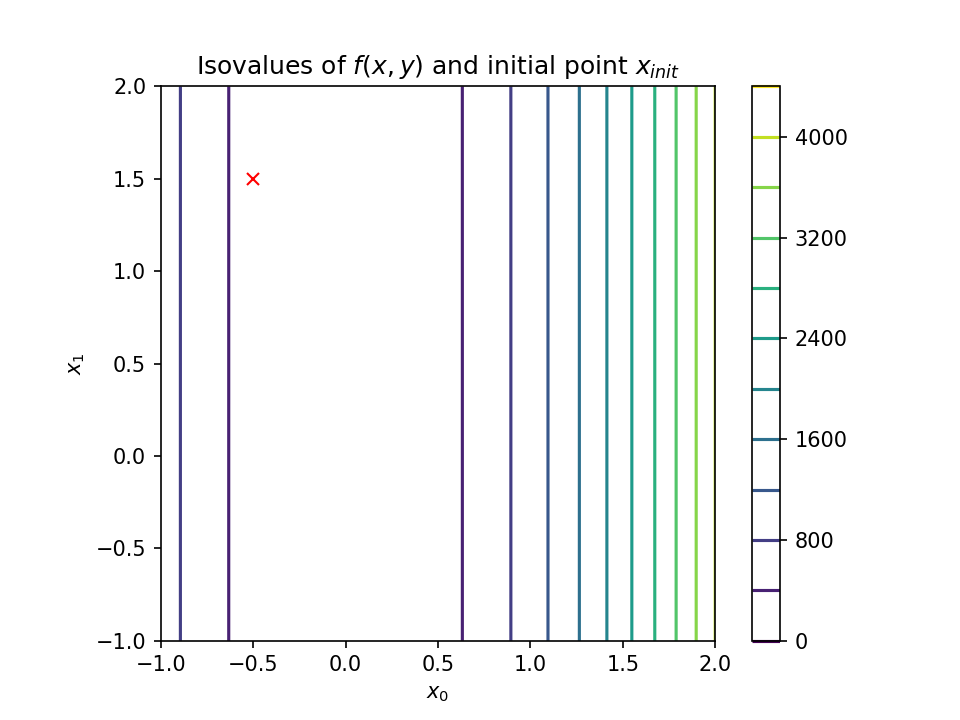

Has the algorithm converged ? :  True


/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_55258/1218033425.py:18: RuntimeWarning: overflow encountered in matmul
  return 0.5*np.dot(x,A@x)-np.dot(b,x)
/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_55258/1218033425.py:20: RuntimeWarning: overflow encountered in matmul
  return A@x-b
/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_55258/1218033425.py:18: RuntimeWarning: invalid value encountered in matmul
  return 0.5*np.dot(x,A@x)-np.dot(b,x)
/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_55258/1218033425.py:20: RuntimeWarning: invalid value encountered in matmul
  return A@x-b
/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_55258/4185245393.py:14: RuntimeWarning: invalid value encountered in subtract
  x = x - step * g


<IPython.core.display.Javascript object>


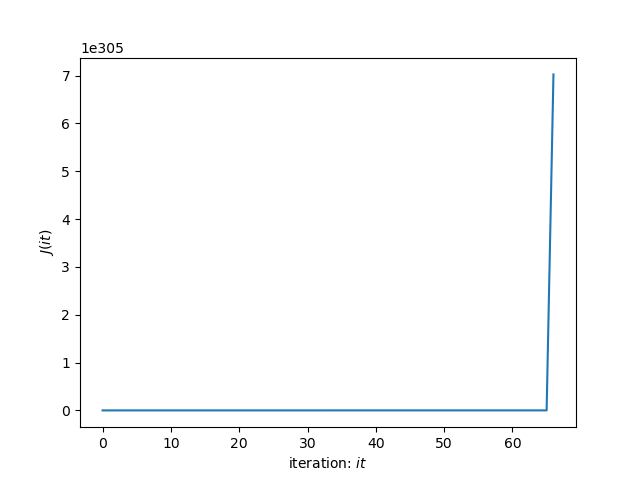

<IPython.core.display.Javascript object>


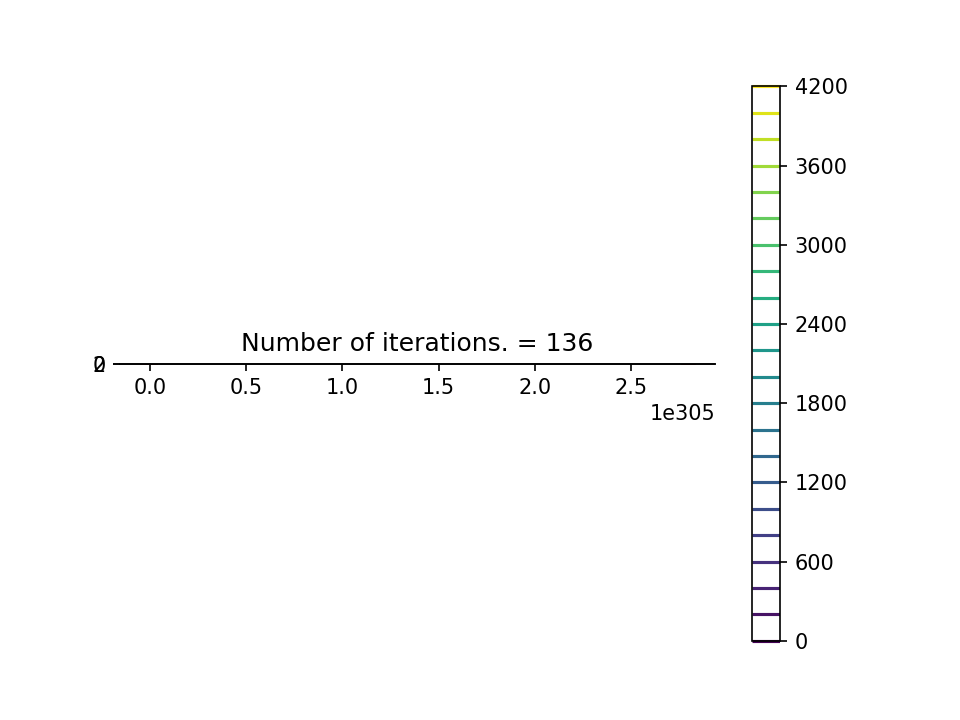

In [8]:
# Exercise 1.2 (d) 
A = np.array([[2000,0.0],[0.0,0.1]])
display(sym.Matrix(A))

ev = np.linalg.eig(A)[0]
print("Eigenvalues of A: ",ev)

maxstep = 2/np.max(ev)
optstep = 2/(np.max(ev)+np.min(ev))

print("Maximal step for GD: ",maxstep)
print("Optimal step for GD: ",optstep)

b = np.array([0.0,0.0])

x0 = np.array([-0.5,1.5])

def J(x):
    return 0.5*np.dot(x,A@x)-np.dot(b,x)
def GradJ(x):
    return A@x-b

print("Initial value:",J(x0))

Tol = 1e-6
plt.figure(dpi=150)
xmin=-1
xmax=2
ymin=-1
ymax=2
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $f(x,y)$ and initial point $x_{init}$')
plt.show()

xtab,ftab,conv = gradientFixedStep(J,GradJ,x0)
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

plt.figure(dpi=150)
plt.contour(aX0,aX1,Z,25)

lx0=[X[0] for X in xtab]
lx1=[X[1] for X in xtab]
plt.plot(lx0,lx1,"-ro")
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.axis('scaled')
plt.colorbar()
#plt.savefig('FixedStep001.png',dpi=300)

plt.show()

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 3**

Implement the gradient descent with a line-search procedure of your choice (Armijo, Goldstein-Price, Wolfe).
</div>

In [9]:
def gradientDescentArmijo(f, df, x_init, tau=0.5, c=0.1, maxiter=200, tol=1e-6):
    x = x_init.copy()
    xtab = []
    ftab = []
    xtab.append(x)  
    ftab.append(f(x))
    it = 0  
    while ((it == 0)
           or (it < maxiter and np.linalg.norm(xtab[-1] - xtab[-2])) > tol):
        it += 1
        g = df(x)
        t = 1.0
        while f(x - t * g) > f(x) - c * t * np.dot(g, g):
            t = tau * t
        x = x - t * g
        xtab.append(x)
        ftab.append(f(x))
    if (it == maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

Matrix([
[1.0, 0.4],
[0.4, 2.0]])

Eigenvalues of A:  [0.85968758 2.14031242]
Maximal step for GD:  0.9344430176703427
Optimal step for GD:  0.6666666666666667
Initial value: 0.625


<IPython.core.display.Javascript object>


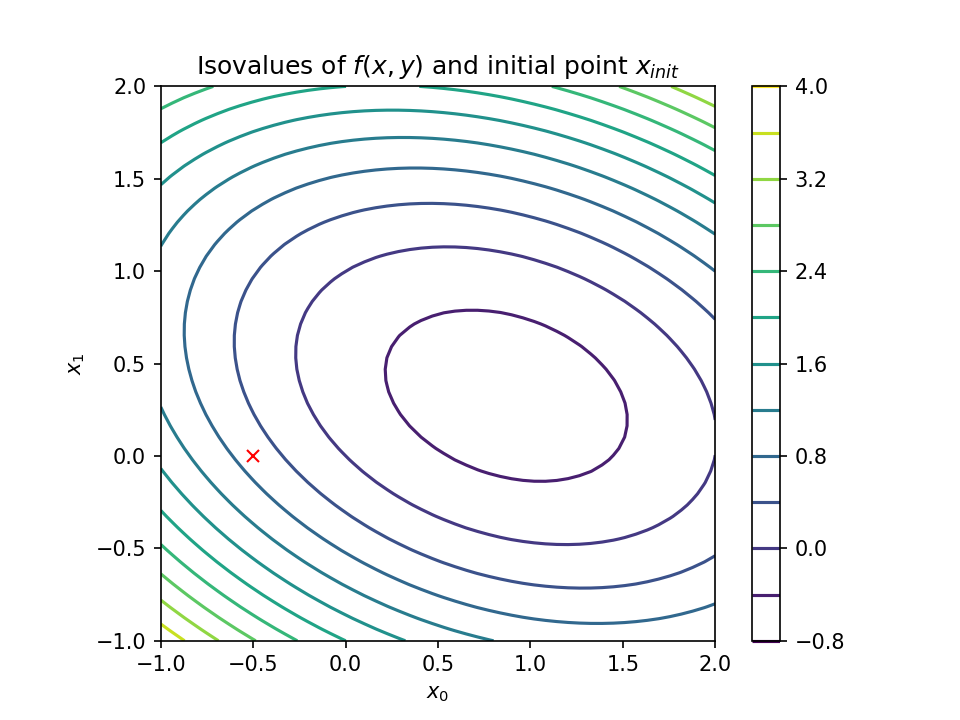

Has the algorithm converged ? :  True


<IPython.core.display.Javascript object>


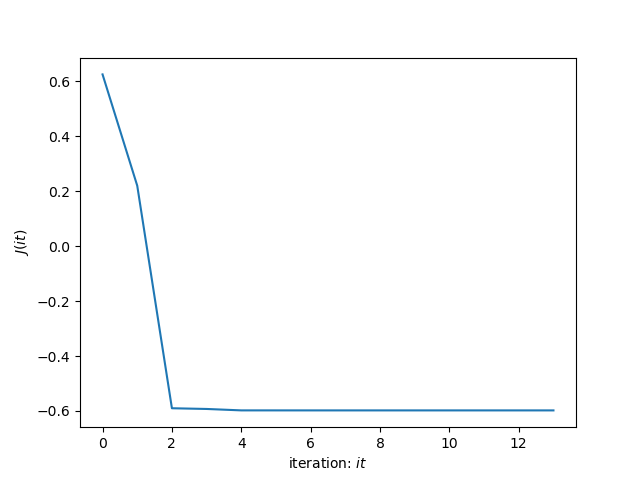

<IPython.core.display.Javascript object>


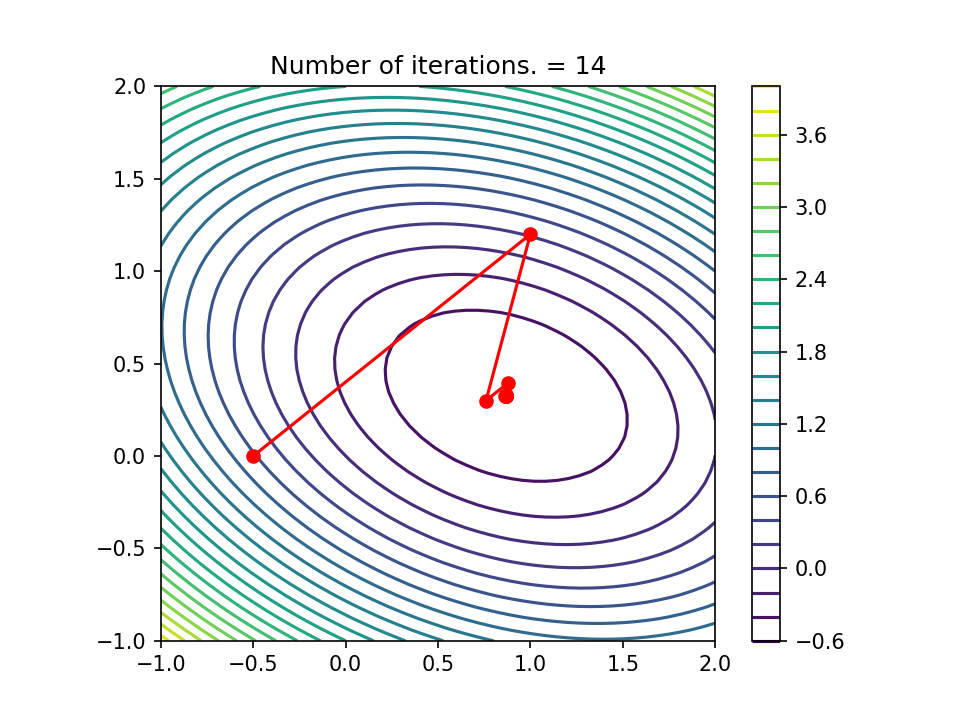

In [10]:
A = np.array([[1.0,0.4],[0.4,2]])
display(sym.Matrix(A))

ev = np.linalg.eig(A)[0]
print("Eigenvalues of A: ",ev)

maxstep = 2/np.max(ev)
optstep = 2/(np.max(ev)+np.min(ev))

print("Maximal step for GD: ",maxstep)
print("Optimal step for GD: ",optstep)

b = np.array([1,1])

x0 = np.array([-0.5,0])

def J(x):
    return 0.5*np.dot(x,A@x)-np.dot(b,x)
def GradJ(x):
    return A@x-b

print("Initial value:",J(x0))

Tol = 1e-6
plt.figure(dpi=150)
xmin=-1
xmax=2
ymin=-1
ymax=2
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $f(x,y)$ and initial point $x_{init}$')
plt.show()

xtab,ftab,conv = gradientDescentArmijo(J,GradJ,x0)
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

plt.figure(dpi=150)
plt.contour(aX0,aX1,Z,25)

lx0=[X[0] for X in xtab]
lx1=[X[1] for X in xtab]
plt.plot(lx0,lx1,"-ro")
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.axis('scaled')
plt.colorbar()
#plt.savefig('FixedStep001.png',dpi=300)

plt.show()

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 4**

**(Challenge)** In the quadratic case compute the condition number of the matrix and deduce, the expected convergence ratio $\left(\frac{Q-1}{Q+1}\right)$, in terms of the norm $\|\cdot\|_A$. Deduce an upper bound on the number of iterations needed to reach a certain precision.

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 4</td>
</tr>
</table>

---

We have a quadratic function given by
$$
f(x)=\frac{1}{2} x^T A x-b \cdot x
$$
where $A$ is a symmetric positive definite matrix. The condition number of $A$ is defined as the ratio of the maximum and minimum eigenvalues of $A$, i.e
$$
\gamma(A)=\frac{\lambda_{\max}(A)}{\lambda_{\min}(A)}
$$
where $\lambda_{\max}(A)$ and $\lambda_{\min}(A)$ denote the largest and smallest eigenvalues of $A$, respectively.

In the quadratic case, the Hessian matrix of $f$ is given by $A$, and the gradient at $x_k$ is $\nabla f(x_k) = Ax_k - b$. Let $x_*$ be the minimizer of $f$. Then, the update rule for the gradient descent method is given by
$$
x_{k+1}=x_k-\alpha_k \nabla f(x_k)
$$
Then we got
$$
\alpha_k=\frac{\left\|x_k-x_*\right\|_A^2}{\left\|A x_k-b\right\|_A^2}
$$
where $|\cdot|_A$ denotes the norm induced by $A$, i.e., $|x|_A = \sqrt{x^T A x}$.

Then we apply the definition of the condition number of $A$  adn let $Q=\kappa(A)$. In the quadratic case, we have the convergence ratio
$$
\frac{\left\|x_{k+1}-x_*\right\|_A^2}{\left\|x_k-x_*\right\|_A^2} \leq \frac{Q-1}{Q+1}
$$
This ratio implies that the error is reduced by a factor of $(Q-1)/(Q+1)$ in each iteration. Therefore, an upper bound on the number of iterations required to reduce the error by a factor of $\epsilon$ is given by
$$
(\frac{Q-1}{Q+1})^{k} \leq \epsilon \Longrightarrow k \geq \frac{\log (\epsilon)}{\log ((Q-1) /(Q+1))}
$$

---